### Big Mart Sales Prediction

#### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

- ##### Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### Data Dictionary
We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

In [41]:
## Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
df.shape

(8523, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [46]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

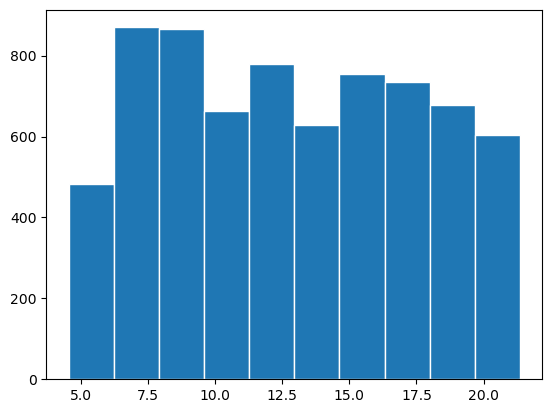

In [47]:
plt.hist(df['Item_Weight'], bins =10, linewidth=1, edgecolor="white")
plt.show()

Since, there are no Outliers substituting Mean value for all the NUll values

In [48]:
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())

df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

For Outlet Size let check the pattern in data

In [49]:
df.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
High       932
Medium    2793
Small     2388
Name: Outlet_Size, dtype: int64

- Replacing Null values with Mode value which is "Medium

In [50]:

df['Outlet_Size']= df['Outlet_Size'].fillna("Medium")

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 2. Exploratory Data Analysis & Outliers Cleanup

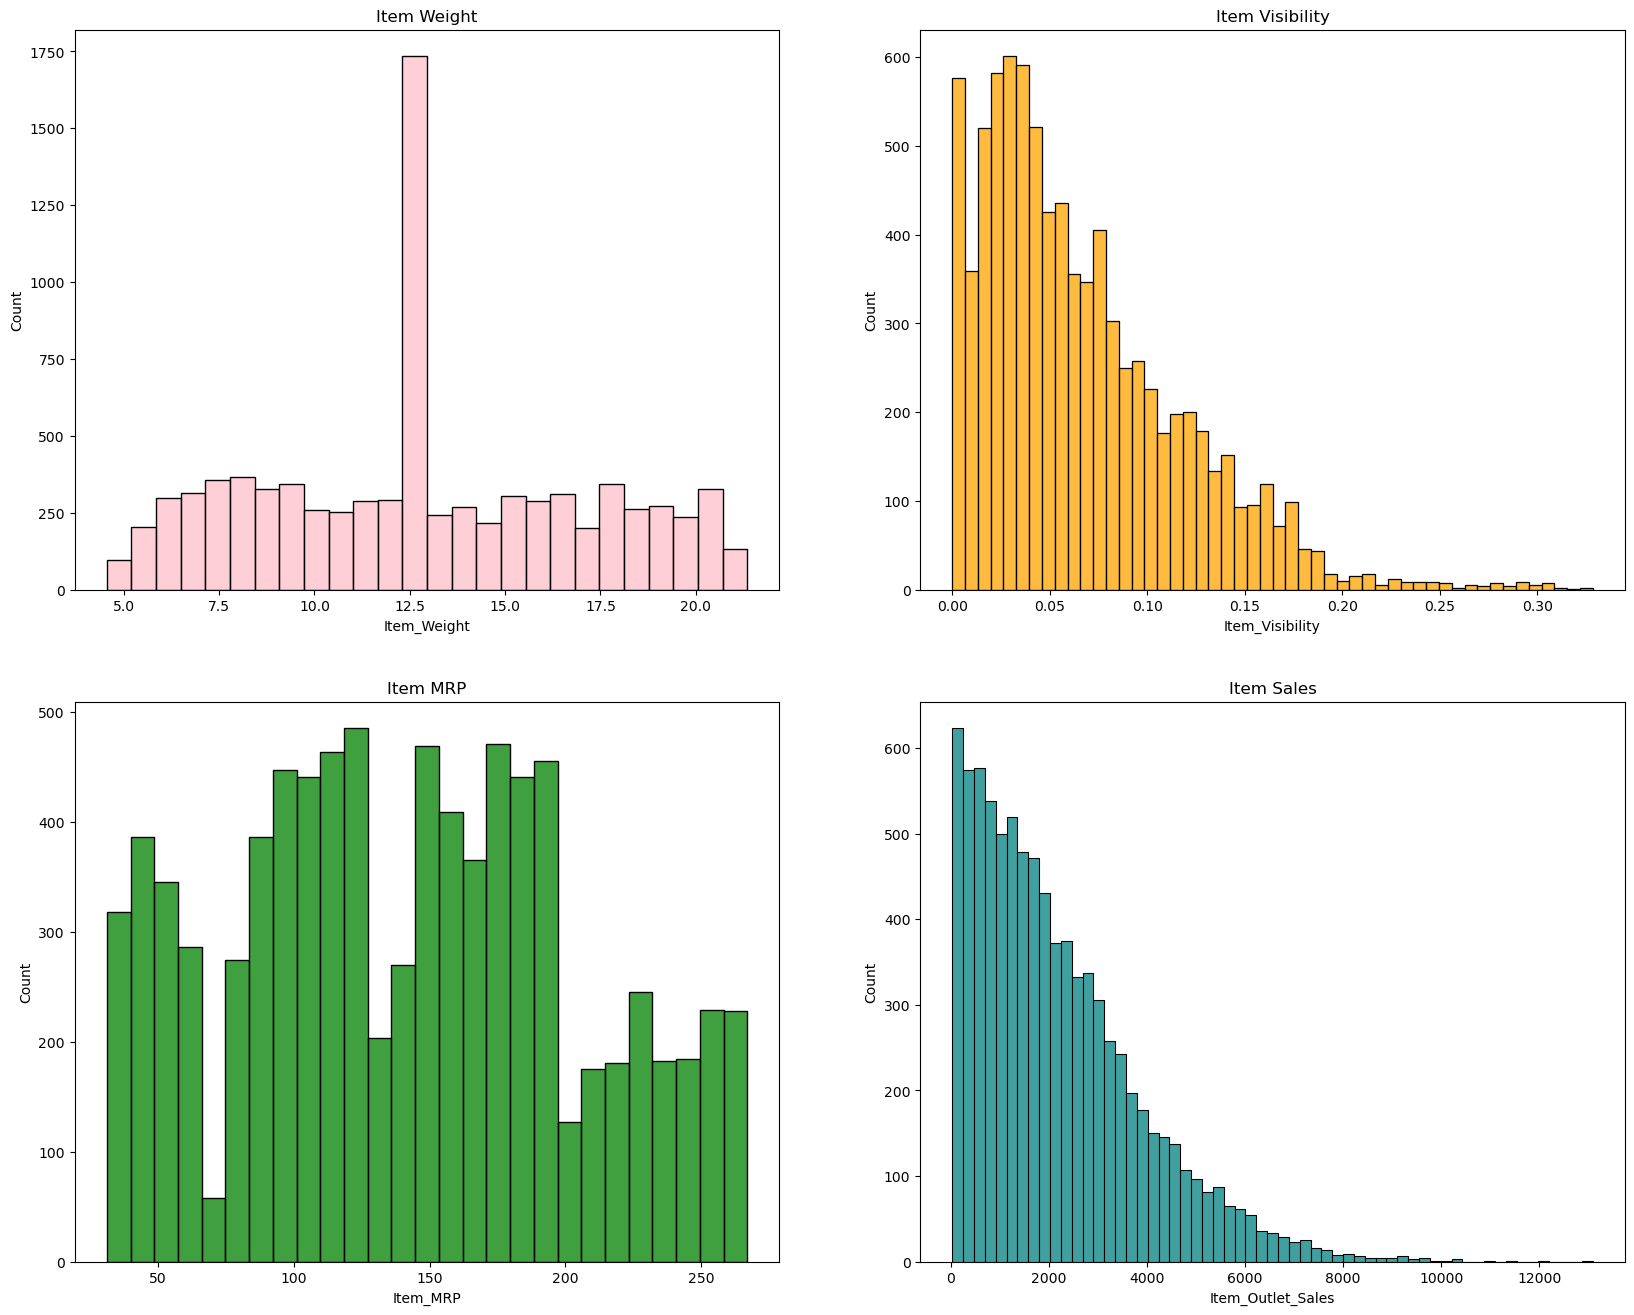

In [51]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
plt.title("Item Weight")
sns.histplot(df['Item_Weight'], color='pink')

plt.subplot(2,2,2)
plt.title("Item Visibility")
sns.histplot(df['Item_Visibility'], color='orange')

plt.subplot(2,2,3)
plt.title("Item MRP")
sns.histplot(df['Item_MRP'], color='green')

plt.subplot(2,2,4)
plt.title("Item Sales")
sns.histplot(df['Item_Outlet_Sales'], color='teal')

plt.show()

#### Checking the Unique Values in Categorical columns

#### Feature Engineering of Numeric columns

In [52]:
def remove_outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3- q1
    
    upper_limit = q3 + 1.5*iqr
    
    count_outliers = df[df[col] > upper_limit].shape[0]

    print(f'{count_outliers} outliers out of {df.shape[0]}. i.e; {count_outliers/df.shape[0]*100:.2f}% of outliers.')
    
    return df[df[col] < upper_limit]

In [53]:
df = remove_outliers('Item_Visibility')

144 outliers out of 8523. i.e; 1.69% of outliers.


In [54]:
df = remove_outliers('Item_Outlet_Sales')


186 outliers out of 8379. i.e; 2.22% of outliers.


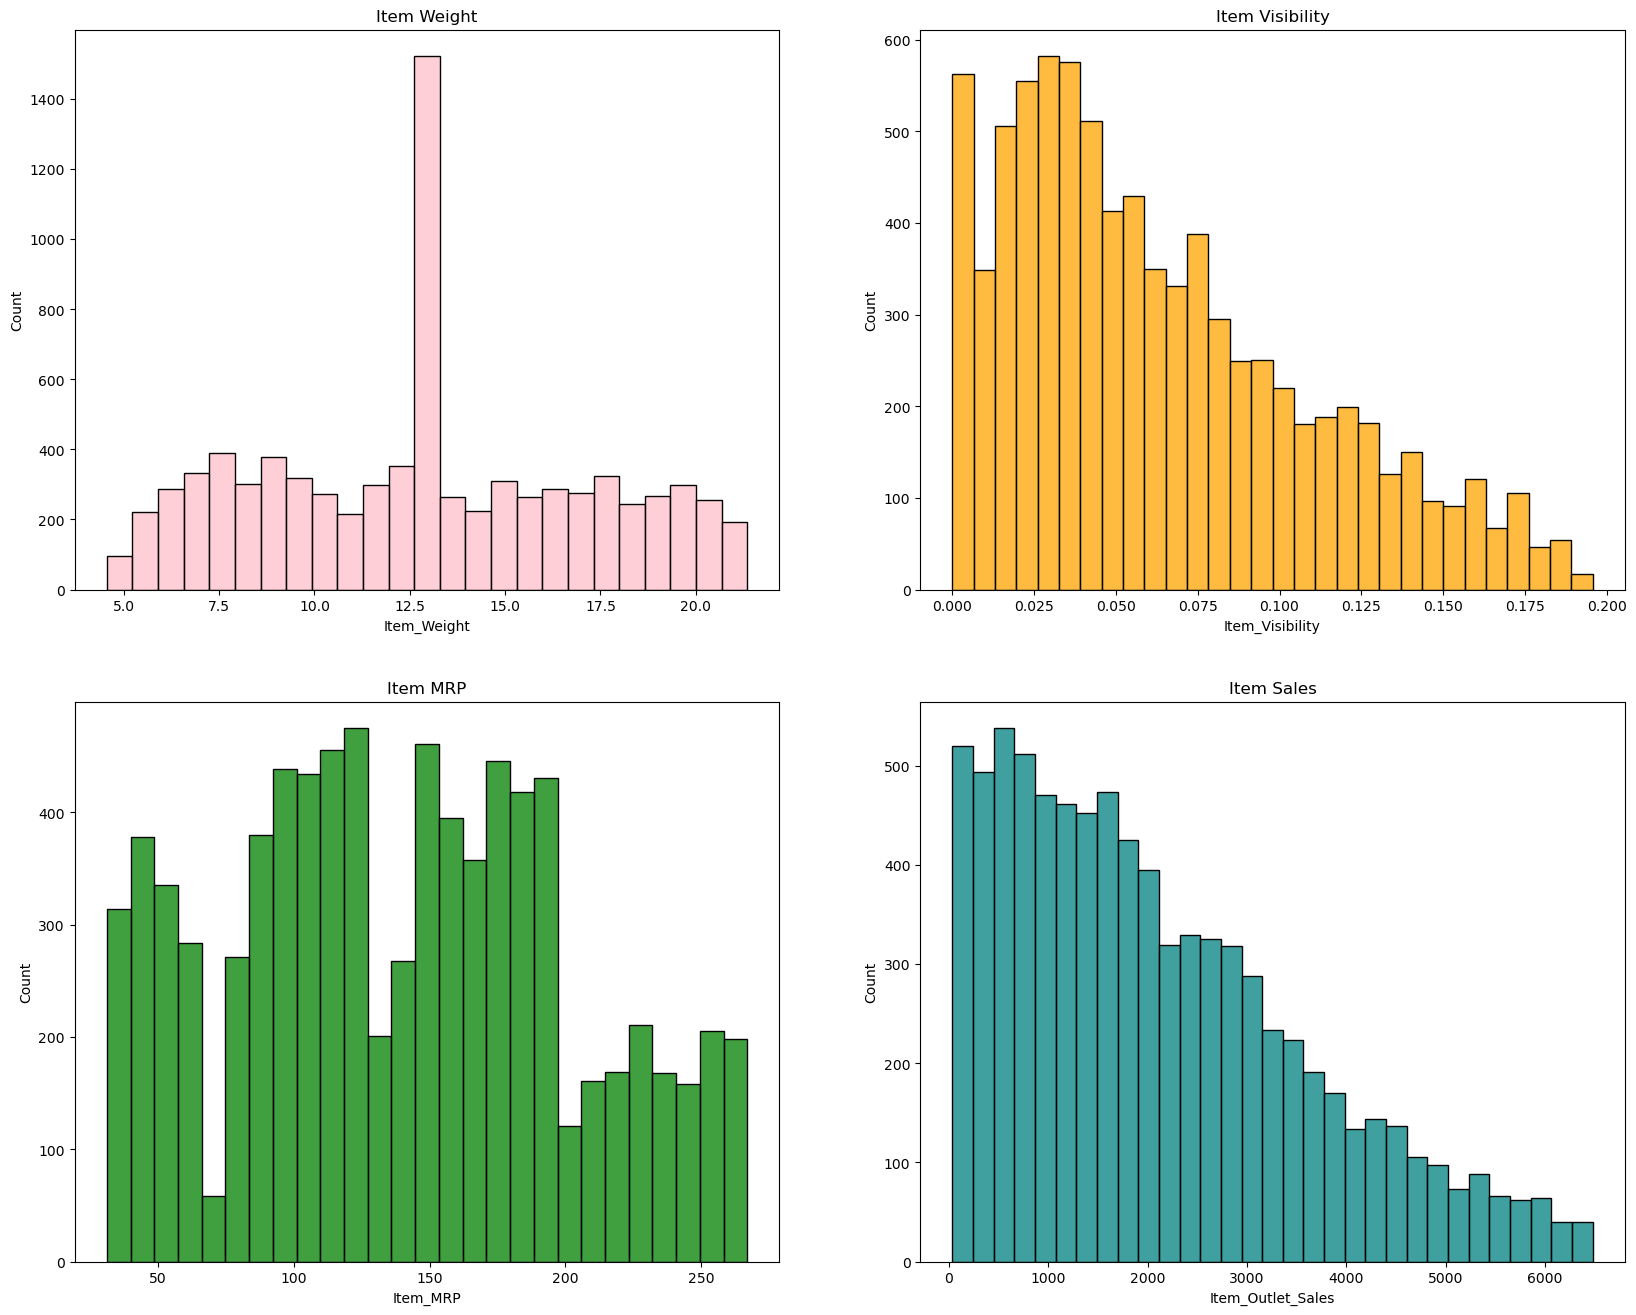

In [55]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
plt.title("Item Weight")
sns.histplot(df['Item_Weight'], color='pink')

plt.subplot(2,2,2)
plt.title("Item Visibility")
sns.histplot(df['Item_Visibility'], color='orange')

plt.subplot(2,2,3)
plt.title("Item MRP")
sns.histplot(df['Item_MRP'], color='green')

plt.subplot(2,2,4)
plt.title("Item Sales")
sns.histplot(df['Item_Outlet_Sales'], color='teal')

plt.show()

#### We can observe that all the Outliers have been removed now

Checking the Establishment Year Column

In [56]:
df.groupby(['Outlet_Establishment_Year'])['Outlet_Establishment_Year'].count()

Outlet_Establishment_Year
1985    1283
1987     917
1997     920
1998     488
1999     919
2002     920
2004     914
2007     907
2009     925
Name: Outlet_Establishment_Year, dtype: int64

- We can convert this to Years_from_establishment

In [57]:
df['years_from_establishment'] = 2023 - df['Outlet_Establishment_Year']

df.groupby(['years_from_establishment'])['years_from_establishment'].count()

years_from_establishment
14     925
16     907
19     914
21     920
24     919
25     488
26     920
36     917
38    1283
Name: years_from_establishment, dtype: int64

In [58]:
## Drop Outlet establishment column, as it is a duplicate

df.drop('Outlet_Establishment_Year', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Item_Identifier           8193 non-null   object 
 1   Item_Weight               8193 non-null   float64
 2   Item_Fat_Content          8193 non-null   object 
 3   Item_Visibility           8193 non-null   float64
 4   Item_Type                 8193 non-null   object 
 5   Item_MRP                  8193 non-null   float64
 6   Outlet_Identifier         8193 non-null   object 
 7   Outlet_Size               8193 non-null   object 
 8   Outlet_Location_Type      8193 non-null   object 
 9   Outlet_Type               8193 non-null   object 
 10  Item_Outlet_Sales         8193 non-null   float64
 11  years_from_establishment  8193 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 832.1+ KB


#### Checking the Categorical Columns

In [59]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

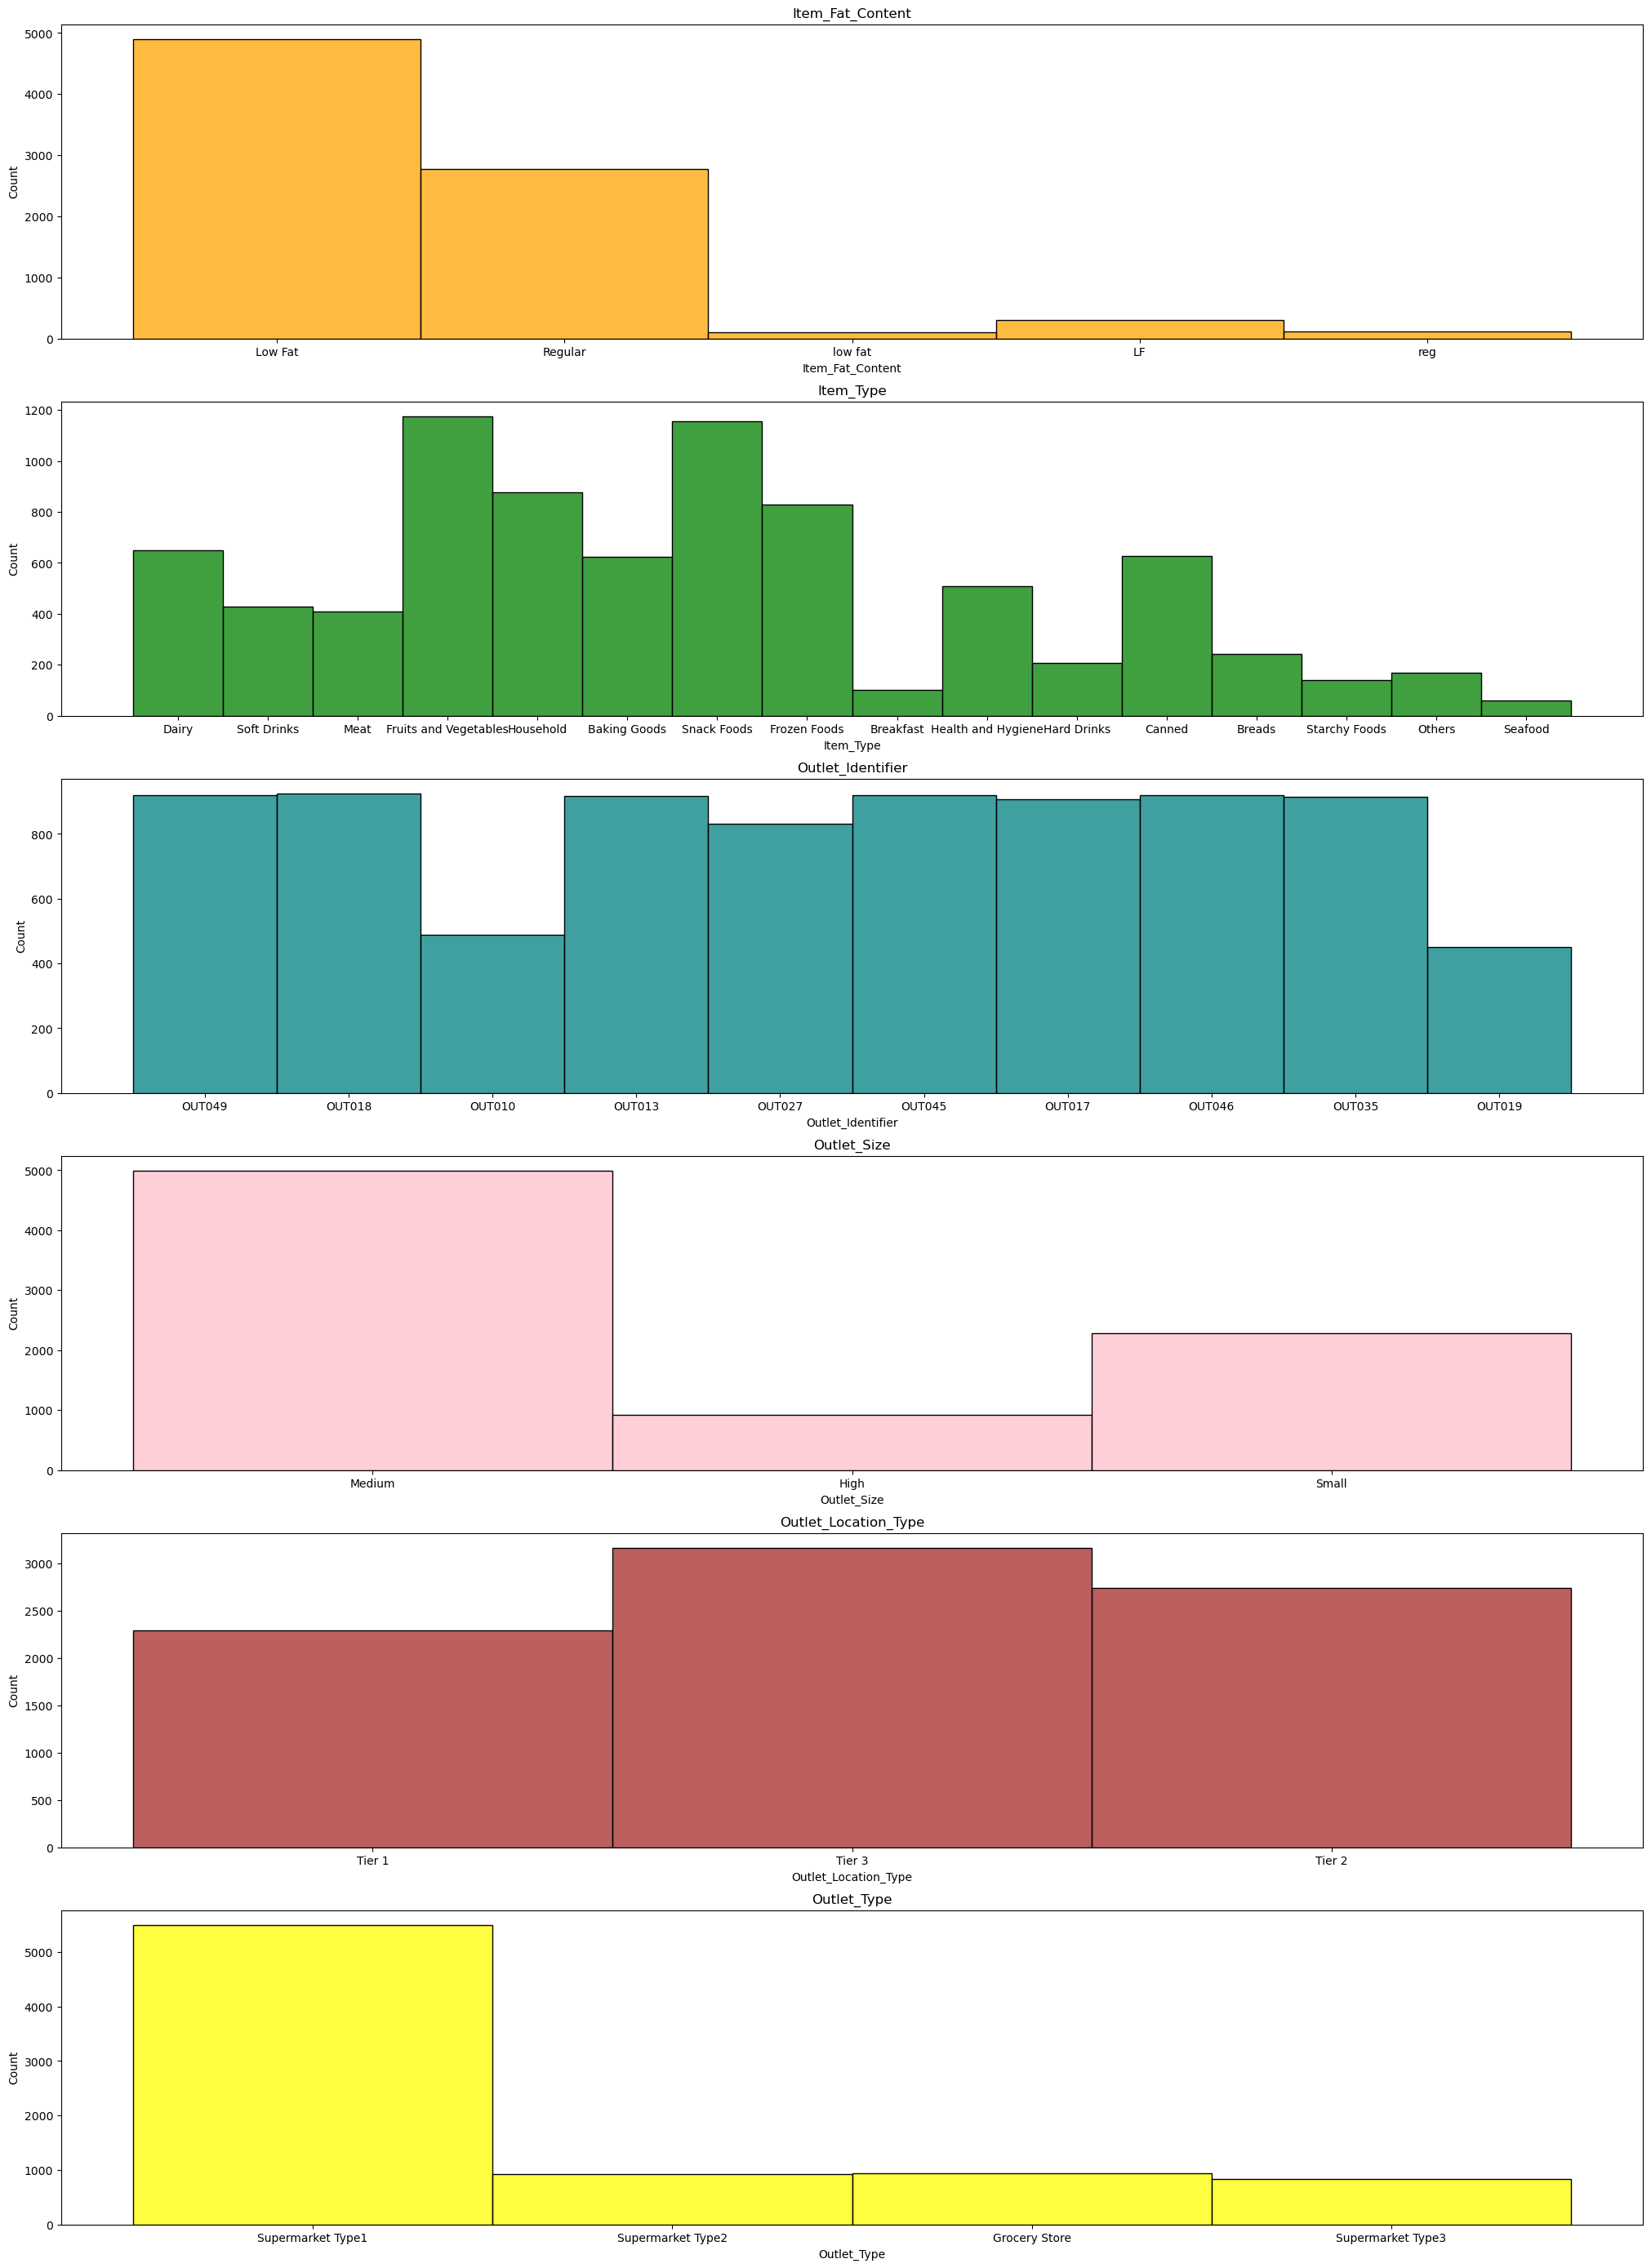

In [60]:
plt.figure(figsize=(25,35))

plt.subplot(6,1,1)
plt.title("Item_Fat_Content")
sns.histplot(df['Item_Fat_Content'], color='orange')

plt.subplot(6,1,2)
plt.title("Item_Type")
sns.histplot(df['Item_Type'], color='green')

plt.subplot(6,1,3)
plt.title("Outlet_Identifier")
sns.histplot(df['Outlet_Identifier'], color='teal')

plt.subplot(6,1,4)
plt.title("Outlet_Size")
sns.histplot(df['Outlet_Size'], color='pink')

plt.subplot(6,1,5)
plt.title("Outlet_Location_Type")
sns.histplot(df['Outlet_Location_Type'], color='brown')

plt.subplot(6,1,6)
plt.title("Outlet_Type")
sns.histplot(df['Outlet_Type'], color='yellow')

plt.show()

Under Item Fat Content Column, 
- Low Fat has been given as low fat, Low Fat & LF - it needs to be corrected
- Regular has been entered as reg & regular - it needs to be corrected

In [61]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
Low Fat    5309
Regular    2884
Name: Item_Fat_Content, dtype: int64

This can be further simpified to Low_fat_content 
- yes - 1 and 
- no - 0

In [62]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['Low Fat'],1)
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(['Regular'],0)

df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
0    2884
1    5309
Name: Item_Fat_Content, dtype: int64

In [63]:
df['Low_Fat_Content'] = df['Item_Fat_Content']

In [64]:
df.drop('Item_Fat_Content', axis=1, inplace=True)

Outlet Size column can be simplified 

In [65]:
df['Outlet_Size'] = df['Outlet_Size'].map({'Small': 1,'Medium': 2,'High': 3}).astype(int)

df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1': 1,'Tier 2': 2,'Tier 3': 3}).astype(int)

df['Outlet_Type'] = df['Outlet_Type'].map({'Grocery Store': 0,'Supermarket Type1': 1,'Supermarket Type2': 2,'Supermarket Type3': 3}).astype(int)


In [66]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_from_establishment,Low_Fat_Content
0,FDA15,9.300000,0.016047,Dairy,249.8092,OUT049,2,1,1,3735.1380,24,1
1,DRC01,5.920000,0.019278,Soft Drinks,48.2692,OUT018,2,3,2,443.4228,14,0
2,FDN15,17.500000,0.016760,Meat,141.6180,OUT049,2,1,1,2097.2700,24,1
3,FDX07,19.200000,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,0,732.3800,25,0
4,NCD19,8.930000,0.000000,Household,53.8614,OUT013,3,3,1,994.7052,36,1
5,FDP36,10.395000,0.000000,Baking Goods,51.4008,OUT018,2,3,2,556.6088,14,0
6,FDO10,13.650000,0.012741,Snack Foods,57.6588,OUT013,3,3,1,343.5528,36,0
7,FDP10,12.857645,0.127470,Snack Foods,107.7622,OUT027,2,3,3,4022.7636,38,1
8,FDH17,16.200000,0.016687,Frozen Foods,96.9726,OUT045,2,2,1,1076.5986,21,0
9,FDU28,19.200000,0.094450,Frozen Foods,187.8214,OUT017,2,2,1,4710.5350,16,0


In [67]:
df['Item_Identifier'] = df['Item_Identifier'].str.slice(0,2)

In [68]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_from_establishment,Low_Fat_Content
0,FD,9.30,0.016047,Dairy,249.8092,OUT049,2,1,1,3735.1380,24,1
1,DR,5.92,0.019278,Soft Drinks,48.2692,OUT018,2,3,2,443.4228,14,0
2,FD,17.50,0.016760,Meat,141.6180,OUT049,2,1,1,2097.2700,24,1
3,FD,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,0,732.3800,25,0
4,NC,8.93,0.000000,Household,53.8614,OUT013,3,3,1,994.7052,36,1


We can create dummies for the Categorical columns now

In [69]:
df1 = pd.get_dummies(df, columns=['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Low_Fat_Content'])

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 0 to 8522
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8193 non-null   float64
 1   Item_Visibility                  8193 non-null   float64
 2   Item_MRP                         8193 non-null   float64
 3   Item_Outlet_Sales                8193 non-null   float64
 4   years_from_establishment         8193 non-null   int64  
 5   Item_Identifier_DR               8193 non-null   bool   
 6   Item_Identifier_FD               8193 non-null   bool   
 7   Item_Identifier_NC               8193 non-null   bool   
 8   Item_Type_Baking Goods           8193 non-null   bool   
 9   Item_Type_Breads                 8193 non-null   bool   
 10  Item_Type_Breakfast              8193 non-null   bool   
 11  Item_Type_Canned                 8193 non-null   bool   
 12  Item_Type_Dairy          

In [71]:
df1.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,years_from_establishment,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_3,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Location_Type_3,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Low_Fat_Content_0,Low_Fat_Content_1
0,9.300000,0.016047,249.8092,3735.1380,24,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,5.920000,0.019278,48.2692,443.4228,14,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,17.500000,0.016760,141.6180,2097.2700,24,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,19.200000,0.000000,182.0950,732.3800,25,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
4,8.930000,0.000000,53.8614,994.7052,36,False,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True
5,10.395000,0.000000,51.4008,556.6088,14,False,True,False,True,False,...,False,False,False,True,False,False,True,False,True,False
6,13.650000,0.012741,57.6588,343.5528,36,False,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
7,12.857645,0.127470,107.7622,4022.7636,38,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
8,16.200000,0.016687,96.9726,1076.5986,21,False,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
9,19.200000,0.094450,187.8214,4710.5350,16,False,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False


### Model Building

In [72]:
## Import library

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [73]:
X = df1.drop('Item_Outlet_Sales', axis=1)
y = df1['Item_Outlet_Sales']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
def scores(model):
    train_pred = model.predict(X_train)
    print(f'Score on Training dataset = {r2_score(y_train,train_pred)}')
    test_pred = model.predict(X_test)
    print(f'Score on Test dataset = {r2_score(y_test,test_pred)}')

In [77]:
LR = LinearRegression()

LR.fit(X_train, y_train)
scores(LR)

Score on Training dataset = 0.5537247596391515
Score on Test dataset = 0.5417339467230802


### Applying regularization Techniques

The key difference is in how they assign penalties to the coefficients:

Ridge Regression:

1. Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients
2. Minimization objective = LS Obj + α * (sum of square of coefficients)

Lasso Regression:

1. Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients
2. Minimization objective = LS Obj + α * (sum of the absolute value of coefficients)

Here, LS Obj refers to the ‘least squares objective,’ i.e., the linear regression objective without regularization.

In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)
scores(ridge)


Score on Training dataset = 0.5537244240059847
Score on Test dataset = 0.5417516036318427


In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
scores(lasso)

Score on Training dataset = 0.5534854680564075
Score on Test dataset = 0.5425303034502189


In [80]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
scores(rfg)

Score on Training dataset = 0.9344781388324023
Score on Test dataset = 0.5240693906118341


- The Difference between the training score and the test score is huge, which indicatest that it is overfitting the data.
- We can get the better scores for all these algorithms, by find the right suitable paramters through Hyperparameter Tuning.

### Hyperparameter Tuning the Models

#### Hyperparameter Tuning using Ridge

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Initialize the Ridge model
ridge = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1,3,5,7,9,10],
    'fit_intercept': [True]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'alpha': 10, 'fit_intercept': True}
Best score:  0.5491267732952435


In [82]:
ridge_best = Ridge(alpha=10)
ridge_best.fit(X_train,y_train)
scores(ridge_best)

Score on Training dataset = 0.5536966296472943
Score on Test dataset = 0.5418813496575439


#### Hyperparameter Tuning using Lasso

In [83]:
# Create a Lasso regressor
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'alpha': 1.0, 'fit_intercept': False, 'max_iter': 1000}


In [84]:
# Use the best parameters to create a new Lasso model
best_lasso = Lasso(**best_params)
best_lasso.fit(X_train,y_train)
scores(best_lasso)

Score on Training dataset = 0.5534855244138297
Score on Test dataset = 0.5425311660271706


#### Using Random Forest

In [85]:
# Create a RandomForestRegressor
rf = RandomForestRegressor()

# Define the hyperparameter grid with fewer parameters
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Use the best parameters to create a new RandomForestRegressor model
best_rf = RandomForestRegressor(**best_params)

# Fit the model with the best parameters
best_rf.fit(X_train, y_train)

scores(best_rf)

C:\Users\Kumar.Singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Score on Training dataset = 0.5923808786021691
Score on Test dataset = 0.5742101512236888


In [86]:
best_params

{'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 5}

Saving random Forest as the best Model

In [87]:
import joblib

# Save the trained model
joblib.dump(best_rf, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

#### Conclusion

-  Even after trying so many model the results are quite low & can be improved
-  For improving scores we can add more data or more features can help to improve the scores